# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
country = []
w_lon = []
w_lat = []
date = []
w_city = []
settings = {"units": "metric", "appid": api_key}
record = 0
record_set =  1
for city in cities:
    record = record + 1
    if record ==51 :
        record_set += 1
        record = 1
    try :
        response = requests.get(query_url + city).json()
        temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['wind']['speed'])
        Wind_Speed.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        w_lon.append(response['coord']['lon'])
        w_lat.append(response['coord']['lat'])
        date.append(response['dt'])
        w_city.append(response['name'])
        print(f"processing record {record} of set {record_set} | {city}")
    except KeyError:
        print("City was not found")

processing record 1 of set 1 | ushuaia
processing record 2 of set 1 | bredasdorp
processing record 3 of set 1 | yellowknife
processing record 4 of set 1 | punta arenas
processing record 5 of set 1 | east london
City was not found
processing record 7 of set 1 | norman wells
City was not found
processing record 9 of set 1 | avarua
processing record 10 of set 1 | severo-kurilsk
City was not found
processing record 12 of set 1 | santa maria
processing record 13 of set 1 | nikolskoye
processing record 14 of set 1 | saint-philippe
City was not found
processing record 16 of set 1 | puerto ayora
processing record 17 of set 1 | new norfolk
processing record 18 of set 1 | vigrestad
processing record 19 of set 1 | busselton
processing record 20 of set 1 | siyabuswa
processing record 21 of set 1 | kununurra
City was not found
processing record 23 of set 1 | gazanjyk
City was not found
processing record 25 of set 1 | naze
processing record 26 of set 1 | rabaul
processing record 27 of set 1 | acapul

processing record 13 of set 5 | labuhan
City was not found
processing record 15 of set 5 | acajutla
processing record 16 of set 5 | airai
processing record 17 of set 5 | biu
processing record 18 of set 5 | comodoro rivadavia
processing record 19 of set 5 | leh
processing record 20 of set 5 | sandwick
processing record 21 of set 5 | fairbanks
processing record 22 of set 5 | ankang
processing record 23 of set 5 | torbay
processing record 24 of set 5 | vila
processing record 25 of set 5 | hokitika
processing record 26 of set 5 | ishigaki
processing record 27 of set 5 | beloha
processing record 28 of set 5 | arman
processing record 29 of set 5 | bauchi
processing record 30 of set 5 | maltahohe
processing record 31 of set 5 | lagoa
processing record 32 of set 5 | ambah
processing record 33 of set 5 | kaitangata
processing record 34 of set 5 | karlskrona
processing record 35 of set 5 | kudahuvadhoo
processing record 36 of set 5 | itacoatiara
processing record 37 of set 5 | zhob
processing re

processing record 29 of set 9 | margate
processing record 30 of set 9 | geraldton
processing record 31 of set 9 | kandrian
processing record 32 of set 9 | kumanovo
processing record 33 of set 9 | sabang
processing record 34 of set 9 | rio verde de mato grosso
processing record 35 of set 9 | mahibadhoo
processing record 36 of set 9 | salalah
processing record 37 of set 9 | vila franca do campo
City was not found
City was not found
processing record 40 of set 9 | kurumkan
City was not found
processing record 42 of set 9 | boca do acre
processing record 43 of set 9 | sao filipe
processing record 44 of set 9 | manbij
City was not found
processing record 46 of set 9 | neftcala
processing record 47 of set 9 | rawson
processing record 48 of set 9 | fort nelson
City was not found
processing record 50 of set 9 | pitsunda
City was not found
processing record 2 of set 10 | great yarmouth
processing record 3 of set 10 | nyurba
processing record 4 of set 10 | homer
processing record 5 of set 10 | p

In [7]:
weather_dict = {
    "City":w_city , "Max Temp" : temp,"Country":country, "Cloudiness":Cloudiness, "Humidity" : Humidity,"Wind Speed":Wind_Speed,
    "Lat":w_lat,"Lng":w_lon , "Date":date
}

weather_frame = pd.DataFrame(weather_dict)


In [15]:
print(weather_frame.count())
weather_frame.head()

city          546
Max Temp      546
Country       546
Cloudiness    546
Humidity      546
Wind Speed    546
Lat           546
Lng           546
Date          546
dtype: int64


,city,Max Temp,Country,Cloudiness,Humidity,Wind Speed,Lat,Lng,Date
0,Ushuaia,1.00,AR,5.10,80,75,-54.81,-68.31,1537563600
1,Bredasdorp,9.00,ZA,1.00,81,0,-34.53,20.04,1537563600
2,Yellowknife,2.00,CA,3.60,51,40,62.45,-114.38,1537560120
3,Punta Arenas,6.00,CL,5.10,60,0,-53.16,-70.91,1537563600
4,East London,18.03,ZA,2.41,100,0,-33.02,27.91,1537565496


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [1]:
weather_frame.to_csv("output/weatherpydf.csv")

NameError: name 'weather_frame' is not defined

In [32]:
import datetime

now = datetime.datetime.now()
now2 = now.strftime("%m/%d/%y")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

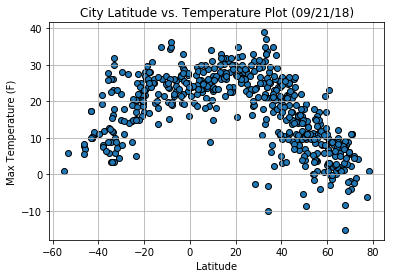

In [33]:
plt.scatter(weather_frame["Lat"], weather_frame["Max Temp"], marker="o",edgecolors='black')
plt.title(f"City Latitude vs. Temperature Plot ({now2})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/Lat_Temp.png")

#### Latitude vs. Humidity Plot

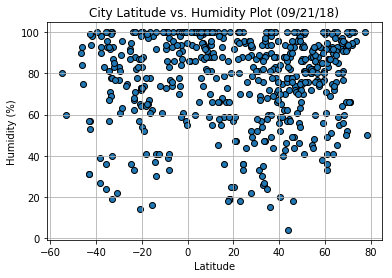

In [35]:
plt.scatter(weather_frame["Lat"], weather_frame["Humidity"], marker="o",edgecolors='black')
plt.title(f"City Latitude vs. Humidity Plot ({now2})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/Lat_Humidity.png")

#### Latitude vs. Cloudiness Plot

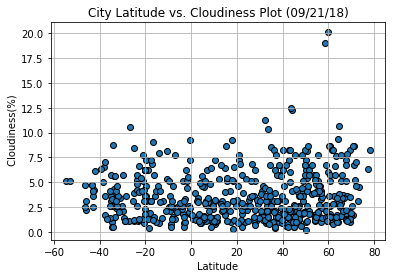

In [36]:
plt.scatter(weather_frame["Lat"], weather_frame["Cloudiness"], marker="o",edgecolors='black')
plt.title(f"City Latitude vs. Cloudiness Plot ({now2})")
plt.ylabel(" Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/Lat_cloud.png")

#### Latitude vs. Wind Speed Plot

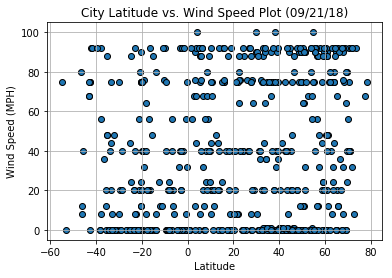

In [37]:
plt.scatter(weather_frame["Lat"], weather_frame["Wind Speed"], marker="o",edgecolors='black')
plt.title(f"City Latitude vs. Wind Speed Plot ({now2})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/Lat_wind.png")

Analysis
- The max tempature decreases as you get away from the equator
- Humidity seems to decrease a little as well when getting away from the equator
- Wind speed and Cloudiness  seem relatively unrelated to the latitude